# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import cv2
from pylab import array, arange
from sklearn import preprocessing
# TODO: Fill this in based on where you saved the training and testing data
training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [44]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 38224
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

## Visualizing the datasets

Number of Samples in each training class


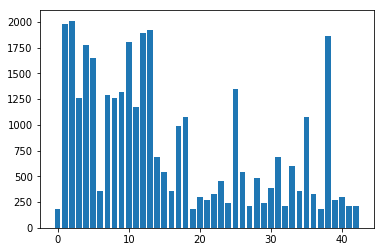

Number of Samples in each testing class


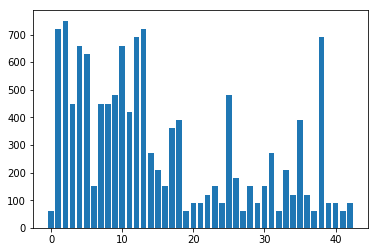

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
#Runs through the data and creates a graph to display the number of samples per class
#display samples per class for training and testing set
def showAveragePerClass(X_list,y_list,n_classes):
    n_samples_per_class = np.zeros(n_classes)
    repr_class_im = np.zeros((43,32,32))
                             
    for i in range(0,n_classes):
        avg_im = np.zeros((32,32))
        im = np.zeros(image_shape)
        for j in range(0,len(X_list)):
            if(y_list[j] == i):
                n_samples_per_class[i] = n_samples_per_class[i] + 1
                im = np.mean(X_list[j].squeeze(),axis=2)
                avg_im = avg_im + im
    plt.bar(range(43),n_samples_per_class)
    plt.show()
    return n_samples_per_class,repr_class_im

print('Number of Samples in each training class')
n_samples_per_class_train,repr_class_im_train = showAveragePerClass(X_train,y_train,n_classes)
print('Number of Samples in each testing class')
n_samples_per_class_test,repr_class_im_test = showAveragePerClass(X_test,y_test,n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Description of Pre-Processing technique

The Preprocessing technique applied to the dataset involves first converting the image to YUV color space, as described in the article, and then taking only the Y layer from the image.
Next we normalize the dataset using the function provided within sklearn package which results in a mean of 0.163 over the training dataset.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def convertYUV(img):
    res = []
    for x in range(len(img)):
        temp = cv2.cvtColor(img[x], cv2.COLOR_RGB2YUV)
        y, u, v = cv2.split(temp)
        y = preprocessing.normalize(y)
        y.shape = y.shape + (1,)
        res.append(y)   
    return res
    
X_train_rgb = X_train
X_train_normalized = convertYUV(X_train)

X_valid_rgb = X_valid
X_valid_normalized = convertYUV(X_valid)

X_test_rgb = X_test
X_test_normalized = convertYUV(X_test)


X_train = X_train_normalized
X_test = X_test_normalized
X_valid = X_valid_normalized

print("Done YUV conversion and normalization")

C:\Miniconda3\envs\carnd-term1\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


Done YUV conversion and normalization


### The new mean of the training dataset

In [5]:
print(np.mean(X_train))

0.163443959602


## PreProcess Functions

#### Below I am defining 3 functions that will be used to modify the dataset and create altered images of the base dataset. Creating these new images allows the training to go through a larger amount of data and learn from the different ways that it may encounter the image.

The functions are as follows:

**random_brightness(img)**
    Takes an input image and applies a random brightness change based on the maximum brightness in the image
    
**random_scale_img(img)**
    Randomly scales up the image to a random size between 1.0x and 1.2x    

In [6]:
def random_scale_img(img):
    img2=img.copy()
    sc_y=0.2*np.random.rand()+1.0
    img2=cv2.resize(img, None, fx=1, fy=sc_y, interpolation = cv2.INTER_CUBIC)
    
    dy = int((img2.shape[1]-img.shape[0])/2)
    end = img.shape[1]-dy
    img2 = img2[dy:end,:]
    assert img2.shape[0] == 32
    return img2

def random_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    return dst

def transform_img(img):
    img = img.copy()
    
    img = random_brightness(img)
    img = random_scale_img(img)
    img.shape = img.shape + (1,)
    return img

### Running the above transform_img(img) function to showcase a few results after processing a few images from the training set

In [7]:
print(transform_img(X_train[100]).shape)

(32, 32, 1)


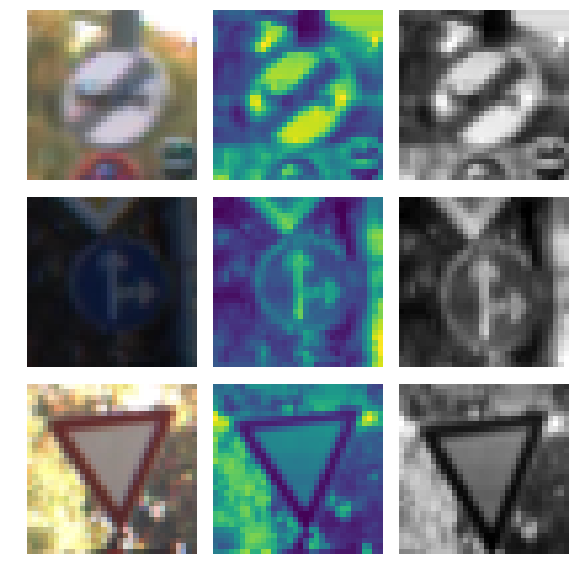

In [8]:
fig, axs = plt.subplots(3,3, figsize=(10, 10))
fig.subplots_adjust(hspace = .1, wspace=.001)
axs = axs.ravel()

#original image 100
img = X_train_rgb[100]
axs[0].axis('off')
axs[0].imshow(img)

#grayscaled image 100
axs[1].axis('off')
axs[1].imshow(X_train[100].squeeze())

#transformed image 100
axs[2].axis('off')
axs[2].imshow(transform_img(X_train[100]).squeeze(), cmap="gray")

#original image 1000
img = X_train_rgb[1000]
axs[3].axis('off')
axs[3].imshow(img)

#grayscaled image 1000
axs[4].axis('off')
axs[4].imshow(X_train[1000].squeeze())

#transformed image 1000
axs[5].axis('off')
axs[5].imshow(transform_img(X_train[1000]).squeeze(),cmap="gray")

#original image 7000
img = X_train_rgb[22222]
axs[6].axis('off')
axs[6].imshow(img)

#grayscaled image 7000
axs[7].axis('off')
axs[7].imshow(X_train[22222].squeeze())

#transformed image 7000
axs[8].axis('off')
axs[8].imshow(transform_img(X_train[22222]).squeeze(), cmap="gray")

In [9]:
print("len of x train", len(X_train))
print("shape of x train", X_train[0].shape)
print("len of x train normal", len(X_train_normalized))
print("shape of x train normal", X_train_normalized[0].shape)
print("shape after transform img x train", transform_img(X_train[0]).shape)
print("shape after transform img x train normal", transform_img(X_train_normalized[0]).shape)

len of x train 34799
shape of x train (32, 32, 1)
len of x train normal 34799
shape of x train normal (32, 32, 1)
shape after transform img x train (32, 32, 1)
shape after transform img x train normal (32, 32, 1)


## Create more training data

### Add transformed images(function above) to every class until no class have less than 850 samples

In [10]:
print('X, y shapes:', X_train_normalized[0].shape, y_train.shape)

input_indices = []
output_indices = []

for class_n in range(n_classes):
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 850:
        print(class_n, "-> Adding: ", 850-n_samples)
        for i in range(850 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(len(X_train_normalized))
            new_img = X_train_normalized[class_indices[0][i % n_samples]]
            new_img = transform_img(new_img)
            new_img.shape = new_img.shape
            X_train_normalized = np.concatenate((X_train_normalized, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            
print('X, y shapes:', X_train_normalized.shape, y_train.shape)

X, y shapes: (32, 32, 1) (34799,)
0 -> Adding:  670
6 -> Adding:  490
14 -> Adding:  160
15 -> Adding:  310
16 -> Adding:  490
19 -> Adding:  670
20 -> Adding:  550
21 -> Adding:  580
22 -> Adding:  520
23 -> Adding:  400
24 -> Adding:  610
26 -> Adding:  310
27 -> Adding:  640
28 -> Adding:  370
29 -> Adding:  610
30 -> Adding:  460
31 -> Adding:  160
32 -> Adding:  640
33 -> Adding:  251
34 -> Adding:  490
36 -> Adding:  520
37 -> Adding:  670
39 -> Adding:  580
40 -> Adding:  550
41 -> Adding:  640
42 -> Adding:  640
X, y shapes: (47780, 32, 32, 1) (47780,)


### Display a few examples from the new dataset

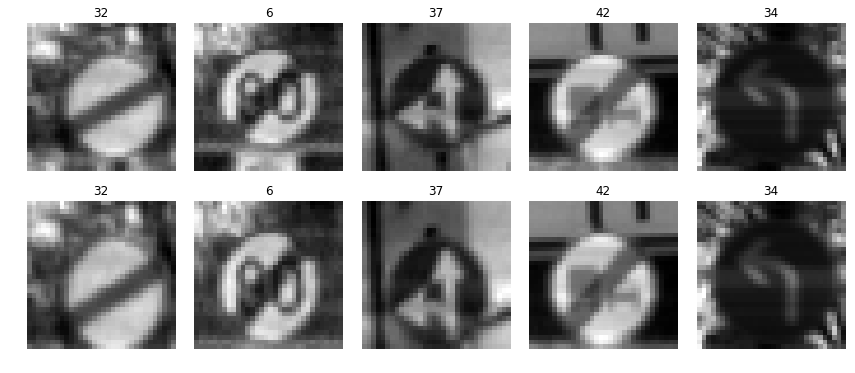

In [12]:
choices = list(range(len(input_indices)))
picks = []
for i in range(5):
    rnd_index = np.random.randint(low=0,high=len(choices))
    picks.append(choices.pop(rnd_index))
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(5):
    image = X_train_normalized[input_indices[picks[i]]].squeeze()
    axs[i].axis('off')
    axs[i].imshow(image, cmap = 'gray')
    axs[i].set_title(y_train[input_indices[picks[i]]])
for i in range(5):
    image = X_train_normalized[output_indices[picks[i]]].squeeze()
    axs[i+5].axis('off')
    axs[i+5].imshow(image, cmap = 'gray')
    axs[i+5].set_title(y_train[output_indices[picks[i]]])

### Here is what the new training dataset looks like

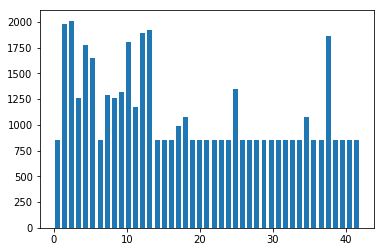

In [13]:
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

### Shuffle the training data to make the learning more robust

In [14]:
from sklearn.utils import shuffle

X_train_normalized, y_train = shuffle(X_train_normalized, y_train)

print('done')

done


### Branch a section (20%) of the training data to create the validation dataset

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train_normalized, y_train, 
                                                                test_size=0.20, random_state=42)

print("Old X_train size:",len(X_train_normalized))
print("X_validation size:",len(X_validation))

Old X_train size: 47780
New X_train size: 38224
X_validation size: 9556


### Model Architecture

#### A modified version of LeNet is the chosen architecture with a mean of 0 and sigma 0.1
#### Number of Epochs is set to 150 with a batch size of 128

The modified LeNet architecture below contains 4 layers, the first 3 being convolutional and the last 1 being fully connected.
It starts with the pre processed image which is a 32,32,1. The outputs of the layers are:

Output layer 1(convolution): 28,28,6

Output Pooling: 14,14,6

Output Layer 2(convolution): 10,10,16

Output Pooling: 5,5,16

Output Layer 3(convolution): 1,1,400

Flattened to an output: 400

Output Layer 4(fully connected): 43

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### LeNet function from the class notes, with 100 Epochs and a batch size of 128
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

EPOCHS = 150
BATCH_SIZE = 128

def LeNet(x):    
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #  Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #  Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #  Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID')
    conv3_b = tf.Variable(tf.zeros(400))
    
    conv3 = tf.nn.relu(conv3)

    # SFlatten. Input = 1x1x400. Output = 400.
    fc1   = flatten(conv3)

    dr2 = tf.nn.dropout(fc1, dropout) 
    
    #  Layer 5: Fully Connected. Input = 400. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(400, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(dr2, fc3_W) + fc3_b

    return logits

### Here I start defining the variables for the tensorflow session

x is the placeholder for the images
y is the placeholder for the labels
dropout is used to determine the dropout value in the LeNet function

In [17]:
# x is placeholder for the image data
# y is placeholder for label data
# dropout is the variable used to determine dropout
# one_hot_y holds the result of the built in one hot function
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
dropout = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### The chosen learning rate is 0.0009

#### The built-in tenforflow optimizer AdamOptimizer is the choice of optimizer

In [18]:
rate = 0.0009
#the logits are created through the LeNet function above
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

###
predict_operation = tf.argmax(logits, 1)
predict_proba_operation = tf.nn.softmax(logits=logits)

### The evaluate function will be used during the tensorflow sessions to return the accuracy of our network during each epoch, it will call the accuracy_operation function to see how accurate our prediction and it returns the average accuracy over the entire data set.

### The predict function will be used later on the images from the web to return our network's predicted values from which we will extract the top result to see how well the network performs on the new images.

In [19]:
#setting up the evaluate function to be used to check the accuracy of the network
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
###
def predict(X_data):
    num_examples = len(X_data)
    sess = tf.get_default_session()
    predicted_proba = list()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        predicted_proba.extend( sess.run(predict_proba_operation, feed_dict={x: batch_x, dropout: 1.0}))
        
        
    return predicted_proba

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [20]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout: 0.5})
        
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.795
Validation Accuracy = 0.786

EPOCH 2 ...
Training Accuracy = 0.908
Validation Accuracy = 0.899

EPOCH 3 ...
Training Accuracy = 0.939
Validation Accuracy = 0.929

EPOCH 4 ...
Training Accuracy = 0.957
Validation Accuracy = 0.945

EPOCH 5 ...
Training Accuracy = 0.967
Validation Accuracy = 0.956

EPOCH 6 ...
Training Accuracy = 0.975
Validation Accuracy = 0.964

EPOCH 7 ...
Training Accuracy = 0.978
Validation Accuracy = 0.964

EPOCH 8 ...
Training Accuracy = 0.986
Validation Accuracy = 0.975

EPOCH 9 ...
Training Accuracy = 0.988
Validation Accuracy = 0.976

EPOCH 10 ...
Training Accuracy = 0.988
Validation Accuracy = 0.978

EPOCH 11 ...
Training Accuracy = 0.991
Validation Accuracy = 0.978

EPOCH 12 ...
Training Accuracy = 0.993
Validation Accuracy = 0.983

EPOCH 13 ...
Training Accuracy = 0.994
Validation Accuracy = 0.984

EPOCH 14 ...
Training Accuracy = 0.995
Validation Accuracy = 0.983

EPOCH 15 ...
Training Accuracy = 0.995
Valid

EPOCH 122 ...
Training Accuracy = 1.000
Validation Accuracy = 0.994

EPOCH 123 ...
Training Accuracy = 1.000
Validation Accuracy = 0.993

EPOCH 124 ...
Training Accuracy = 1.000
Validation Accuracy = 0.994

EPOCH 125 ...
Training Accuracy = 1.000
Validation Accuracy = 0.995

EPOCH 126 ...
Training Accuracy = 1.000
Validation Accuracy = 0.994

EPOCH 127 ...
Training Accuracy = 1.000
Validation Accuracy = 0.995

EPOCH 128 ...
Training Accuracy = 1.000
Validation Accuracy = 0.994

EPOCH 129 ...
Training Accuracy = 1.000
Validation Accuracy = 0.995

EPOCH 130 ...
Training Accuracy = 1.000
Validation Accuracy = 0.995

EPOCH 131 ...
Training Accuracy = 1.000
Validation Accuracy = 0.994

EPOCH 132 ...
Training Accuracy = 1.000
Validation Accuracy = 0.995

EPOCH 133 ...
Training Accuracy = 1.000
Validation Accuracy = 0.993

EPOCH 134 ...
Training Accuracy = 1.000
Validation Accuracy = 0.994

EPOCH 135 ...
Training Accuracy = 1.000
Validation Accuracy = 0.994

EPOCH 136 ...
Training Accuracy = 

In [21]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.933


### Previous Attempts:

Here are a couple different settings I used during testing before deciding on this final set.
There were a lot more attempts with varying preprocessing techniques, augmentation, and the architecture. They produced results lower than .9 for the test accuracy and a low validation accuracy hovering around .93

Minimum Images Per Class: 1000

Epoch: 100

Batch Size: 128

Architecture: Basic LeNet

Learning Rate: .0001

Dropout: 0.7

Training Accuracy: 0.992

Validation Accuracy: 0.979

Test Accuracy: 0.914

-------------------------------------------------------------------

Minimum Images Per Class: 850

Epoch: 100

Batch Size: 128

Architecture: Basic LeNet

Learning Rate: .0005

Dropout: 0.5

Training Accuracy: 0.999

Validation Accuracy: 0.989

Test Accuracy: 0.938

While this had a little better results in the test set it did worse, at 80% for my custom images and validation was less. It also wasn't consistent during retraining.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

C:\Miniconda3\envs\carnd-term1\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


(32, 32, 1)


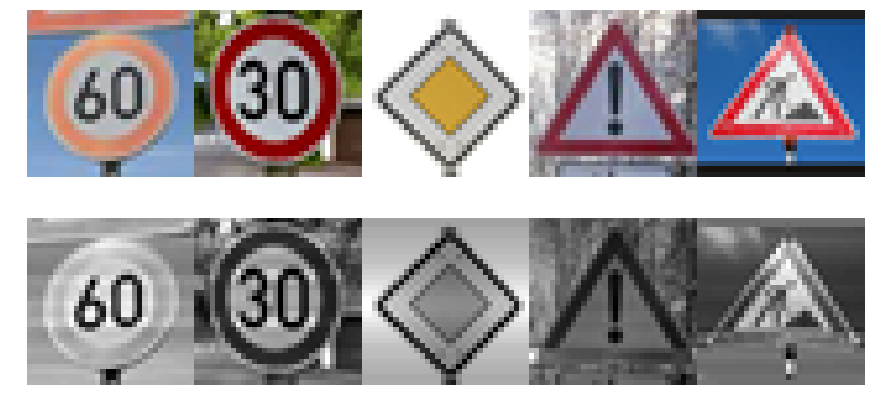

In [45]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import glob
import matplotlib.image as mpimg

fig, axs = plt.subplots(2,5, figsize=(15, 7))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

my_images = []

for i, img in enumerate(glob.glob('./my_images/*.png')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    my_images.append(image)

my_images_normalized = convertYUV(my_images) 

print(my_images_normalized[0].shape)

for i in range(len(my_images_normalized)):
    axs[i+5].axis('off')
    axs[i+5].imshow(my_images_normalized[i].squeeze(), cmap="gray")
    
my_labels = [3,1,12,18,25]

### Predict the Sign Type for Each Image and Analyze Performance

In [46]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    my_accuracy = evaluate(my_images_normalized, my_labels)
    
    my_top_k = sess.run(top_k, feed_dict={x: my_images_normalized, dropout: 1.0})
    print("Guess for first image expected:", my_labels[0], " prediction:", my_top_k[1][0][0])
    print("Guess for second image crossing expected:", my_labels[1], " prediction:", my_top_k[1][1][0])
    print("Guess for third image expected:", my_labels[2], " prediction:", my_top_k[1][2][0])
    print("Guess for fourth image expected:", my_labels[3], " prediction:", my_top_k[1][3][0])
    print("Guess for fifth image expected:", my_labels[4], " prediction:", my_top_k[1][4][0])
    
    print("My Set Accuracy = {:.3f}".format(my_accuracy))
    print(my_accuracy*100, "%")

INFO:tensorflow:Restoring parameters from ./lenet
Guess for first image expected: 3  prediction: 3
Guess for second image crossing expected: 1  prediction: 1
Guess for third image expected: 12  prediction: 12
Guess for fourth image expected: 18  prediction: 18
Guess for fifth image expected: 25  prediction: 25
My Set Accuracy = 1.000
100.0 %


#### Running another test on an image with dark background

(32, 32, 3)
(1, 32, 32, 1)
INFO:tensorflow:Restoring parameters from ./lenet
Guess for first image(wild animal crossing) expected: 31  prediction: 31
My Set Accuracy = 1.000
100.0 %


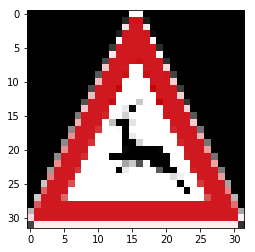

In [42]:
my_imgs = []


image = cv2.imread('./my_images/image2/animal_img_2.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
print(image.shape)
my_imgs.append(image)

my_imgs = np.asarray(my_imgs)
my_images_gry2 = np.sum(my_imgs/3, axis=3, keepdims=True)

my_images_normalized2 = (my_images_gry2 - 128)/128
print(my_images_normalized2.shape)
my_labels = [31]

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    my_accuracy = evaluate(my_images_normalized2, my_labels)
    
    my_top_k = sess.run(top_k, feed_dict={x: my_images_normalized2, dropout: 1.0})
    print("Guess for first image(wild animal crossing) expected:", my_labels[0], " prediction:", my_top_k[1][0][0])
    
    print("My Set Accuracy = {:.3f}".format(my_accuracy))
    print(my_accuracy*100, "%")

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

### The code bit below shows the guesses our network had for each of the images found on the web for traffic signs. 
### Using the softmax and top_k functions we extract the top 3 guesses and display them next to the original image. The network is 100% sure on all but one image where it places the probability at 99%.

INFO:tensorflow:Restoring parameters from ./lenet


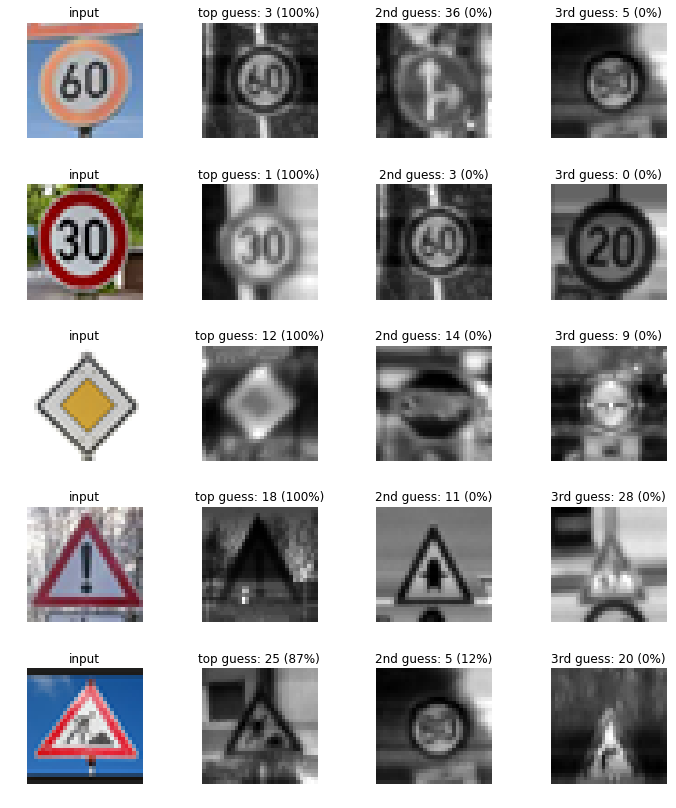

In [43]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_normalized, dropout: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_normalized, dropout: 1.0})

    
    fig, axs = plt.subplots(len(my_images),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(my_images):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_validation == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_validation[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_validation == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_validation[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_validation == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_validation[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))